# Big Mart Sales Prediction

## Abstract :
Any insight into the future puts your organization at an advantage. Forecasting helps you predict potential issues, make better decisions, and measure the impact of those decisions.
Forecasting of sales is a very important aspect for every distribution,manufacturing,marketing and wholesaling compamies. Forecasting gives them a way by which they can take better decision

- Sales Forecasting helps their business to utilize resources efficiently 
- Sales forecasting also helps businesses to estimate their costs and revenue accurately based on which they are able to predict their short-term and long-term performance
- Sales Forecasting help to identify early warning so that corrective measure can be taken 

IN this project we will try to predict sales of a product based on different feature like location,type of super-store by using Regression technique.

## Problem Defination :
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales.

## Business Objective:
BY using this model Big Mart will try to understand pattern in  their sales of differnt-differnt product accross cities which in turn increase their revenue 

## Project Objective:
We will convert this Problem to machine learning Regression Problem.We will build regression model which will predict sales of product across differnt cities.

## Data Set Information :
Big Mart sales data for 1559 products across 10 stores in different cities in 2013 (Analytics Vidhya Hackathons)

## Attribute Information
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product  
- Item_Fat_Content: Whether the product is low fat or not  
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product  
- Item_Type: The category to which the product belongs  
- Item_MRP: Maximum Retail Price (list price) of the product  
- Outlet_Identifier: Unique store ID  
- Outlet_Establishment_Year: The year in which store was established  
- Outlet_Size: The size of the store in terms of ground area covered  
- Outlet_Location_Type: The type of city in which the store is located  
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket   
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted  

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#statistical info about numerical feature of data set
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#finding total rows and columns of the data
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


we can see that item weight and outlet size have some missing values we have to impute these.

In [7]:
#check unique value
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

We have 1559 type of products
16 type of item
3 type of outlet size
3 type of outlet location
and 4 type of outlet

In [8]:
#check null value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Item_Weight contains 1463 null and Outlet_Size has 2410 null values

Now i want to find the columns which have object data type i.e. the columns which has categorical type of data

In [9]:
#check for categorical coloumns
object_column = []
for x in df:
    if df[x].dtypes == "object":
        object_column.append(x)
object_column


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
object_column.remove("Item_Identifier")
object_column.remove("Outlet_Identifier")
object_column


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Now I want to look at which type of data is present in these coloumns and how many type of data is present in these columns and their respective value counts.

In [11]:
#finding what are the  different type of item are in columns and their count
for i in object_column:
    print(i)
    print(df[i].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

# Imputing Missing Values

Now i want to find the mean weight of different product but but mean will be product wise

In [12]:
#filling missing values
item_weight_mean = df.groupby('Item_Identifier').agg({'Item_Weight':np.mean})
item_weight_mean


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


Finding bollean of missing value in item weight column

In [13]:
missing_item_weight = df["Item_Weight"].isnull()
missing_item_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

Now i will find location where boolean of missing value is true in that location i will check for item identifire and i will fill mean of that item identifire in location of item weight.

In [14]:
for i, item in enumerate(df["Item_Identifier"]):
    if missing_item_weight[i]:
        if item in item_weight_mean:
            df["Item_Weight"][i] = item_weight_mean.loc[item]["Item_Weight"]
        else:
            df["Item_Weight"][i] = np.mean(df['Item_Weight'])

In [15]:
df["Item_Weight"].isnull().sum()

0

Now finding the outlet type with their respective mode value

In [16]:
outlet_size_mode = df.pivot_table(values = "Outlet_Size" , columns = "Outlet_Type", aggfunc=(lambda x: x.mode([0])))

In [17]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
missing_outlet = df["Outlet_Size"].isnull()
missing_outlet

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

Now checking Boolean of missing value of outlest size and finding the outlet type of that missing value and filling that missing value with respect to outlet type

In [19]:
df.loc[missing_outlet ,'Outlet_Size'] = df.loc[missing_outlet ,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [20]:
df["Outlet_Size"].isnull().sum()

0

#### Now we have seen from describe that item visibility has 0 value which makes no practical sense.so we will replace the 0 value with mean of the Item_Visibility

In [21]:
(df['Item_Visibility']==0).sum()

526

In [22]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()] , inplace=True)

In [23]:
(df['Item_Visibility']==0).sum()

0

Now from value counts we found that Item fat content has LF and low fat both so making them as single Low fat entry

In [24]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Feature Engineering

We will extract intial two word from item identifire and we can make new feature as new item type which will define wheather it is a food drinking or non consumable item.

In [25]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [26]:
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [27]:
df['New_Item_Type'] =df['New_Item_Type'].map({'FD':'Food','DR':'Drinking','NC':'Non-Consumable'})

In [28]:
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinking           799
Name: New_Item_Type, dtype: int64

Now we will check loaction of new item = nonconsumable and if item fat content is there making it as nonedible because item which is non cosumable can be eaten 

In [29]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [30]:
perishable = ["Breads", "Breakfast", "Dairy", "Snack Foods","Fruits and Vegetables", "Meat", "Seafood", "Starchy Foods"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene","Household", "Soft Drinks"]

In [31]:
def new_item_type(item):
    if item in perishable:
        return 'perishable'
    if item in non_perishable:
        return 'non_perishable'
    else:
        return 'not-known'

In [32]:
df['Shelf_life'] = df['Item_Type'].apply(new_item_type)

In [33]:
df['Shelf_life'].value_counts()

non_perishable    4242
perishable        4112
not-known          169
Name: Shelf_life, dtype: int64

In [34]:
df['MRP_per_unit_weight'] = df['Item_MRP']/df['Item_Weight']

In [35]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Shelf_life,MRP_per_unit_weight,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,perishable,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinking,non_perishable,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,perishable,8.092457,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,perishable,9.484115,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,non_perishable,6.031512,26


## Exploratory Data Analysis

### Visualizing Numerical Feature

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

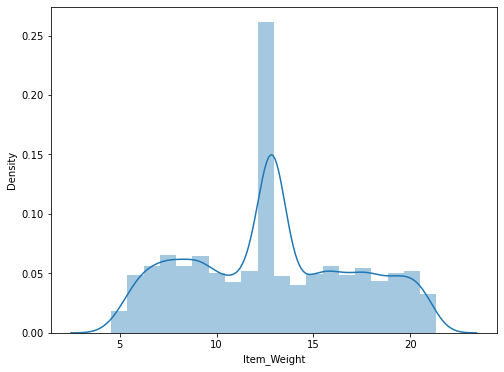

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Weight'], bins=20)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

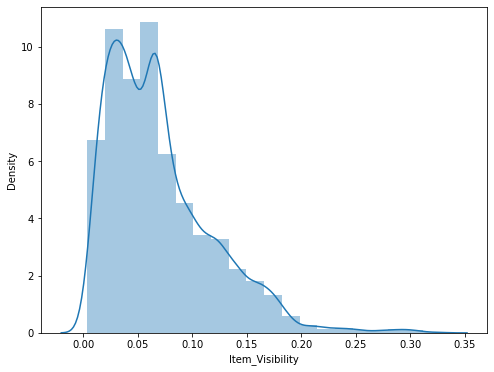

In [38]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Visibility'], bins=20)

In [39]:
#df['Item_Visibility'] = np.log(df['Item_Visibility'])

In [40]:
#sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

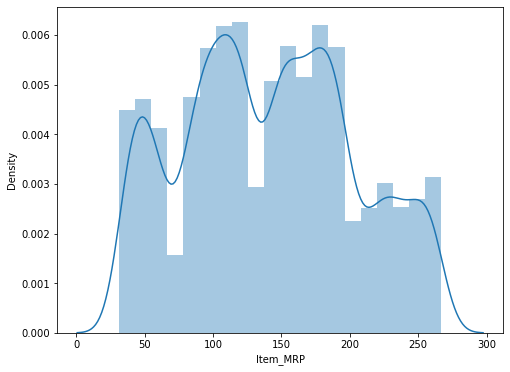

In [41]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_MRP'], bins=20)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

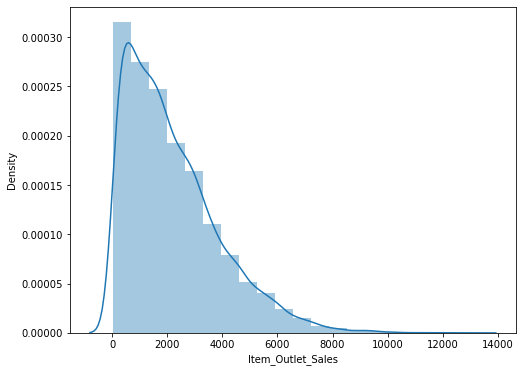

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Outlet_Sales'], bins=20)

Here item outlet sales is right skewed so we have to make it normally distributed so applying log transformation.

In [43]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

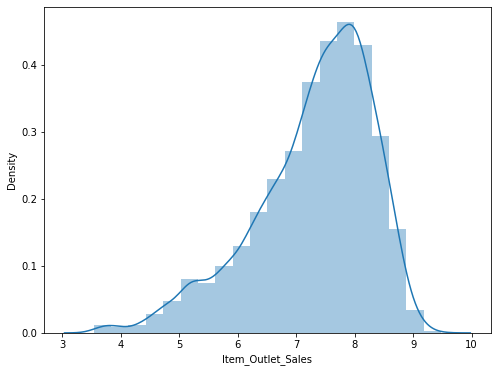

In [44]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Outlet_Sales'], bins=20)

### Visualizing Categorical Feature

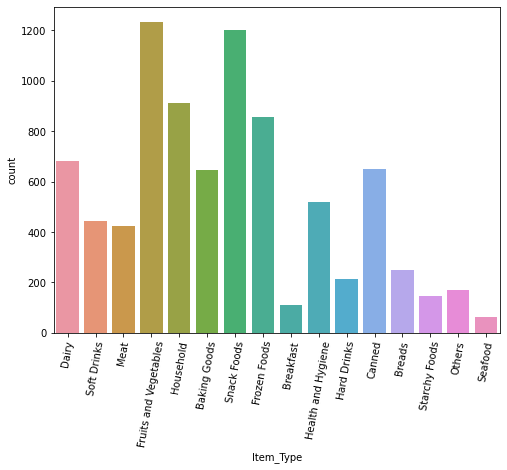

In [45]:
plt.figure(figsize=(8,6))
C_item_type = sns.countplot(df['Item_Type'])
C_item_type.set_xticklabels(C_item_type.get_xticklabels(), rotation=80)
None


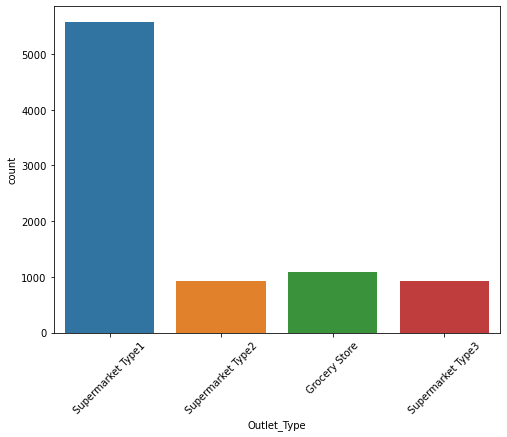

In [46]:
plt.figure(figsize=(8,6))
C_Outlet_Type = sns.countplot(df['Outlet_Type'])
C_Outlet_Type .set_xticklabels(C_Outlet_Type .get_xticklabels(), rotation=45)
None

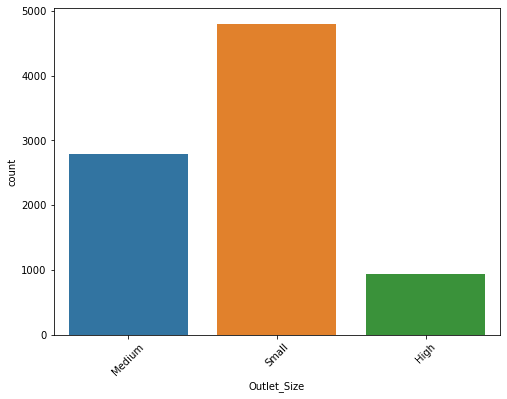

In [47]:
plt.figure(figsize=(8,6))
C_Outlet_Size = sns.countplot(df['Outlet_Size'])
C_Outlet_Size.set_xticklabels(C_Outlet_Size.get_xticklabels(), rotation=45)
None

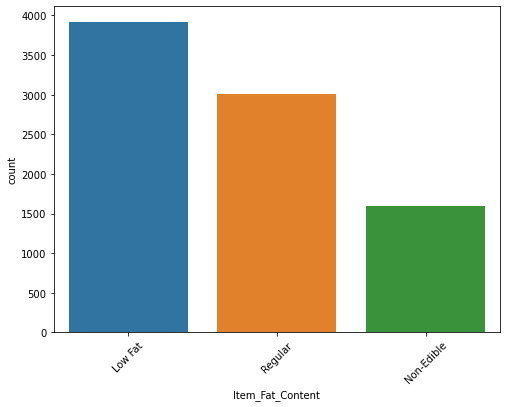

In [48]:
plt.figure(figsize=(8,6))
C_Item_Fat_Content = sns.countplot(df['Item_Fat_Content'])
C_Item_Fat_Content .set_xticklabels(C_Item_Fat_Content .get_xticklabels(), rotation=45)
None

Most of the item are in our data set are low fat content

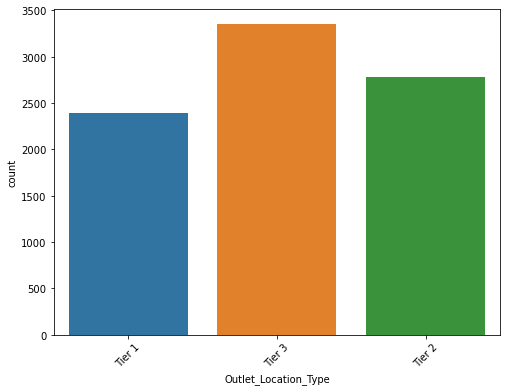

In [49]:
plt.figure(figsize=(8,6))
C_Outlet_Location_Type = sns.countplot(df['Outlet_Location_Type'])
C_Outlet_Location_Type.set_xticklabels(C_Outlet_Location_Type.get_xticklabels(), rotation=45)
None

### Bivariate analysis

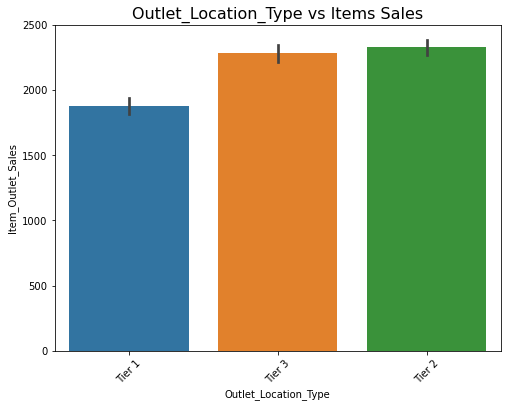

In [50]:
#average sales outlet_type wise
plt.figure(figsize=(8,6))
C_OutletType = sns.barplot(x= 'Outlet_Location_Type', y = np.exp(df['Item_Outlet_Sales']) , data=df)
C_OutletType.set_xticklabels(C_OutletType.get_xticklabels(), rotation=45)
plt.title('Outlet_Location_Type vs Items Sales',fontsize=16)
None

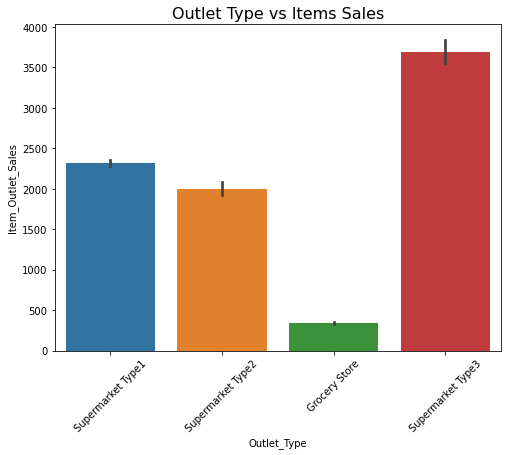

In [51]:
plt.figure(figsize=(8,6))
C_OutletType = sns.barplot(x= 'Outlet_Type', y = np.exp(df['Item_Outlet_Sales']) , data=df)
C_OutletType.set_xticklabels(C_OutletType.get_xticklabels(), rotation=45)
plt.title('Outlet Type vs Items Sales',fontsize=16)
None

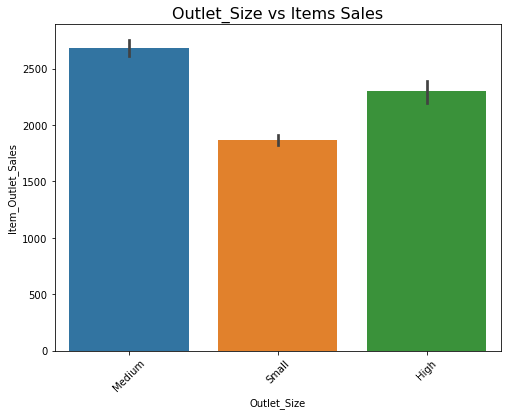

In [52]:
plt.figure(figsize=(8,6))
C_OutletType = sns.barplot(x= 'Outlet_Size', y = np.exp(df['Item_Outlet_Sales']) , data=df)
C_OutletType.set_xticklabels(C_OutletType.get_xticklabels(), rotation=45)
plt.title('Outlet_Size vs Items Sales',fontsize=16)
None

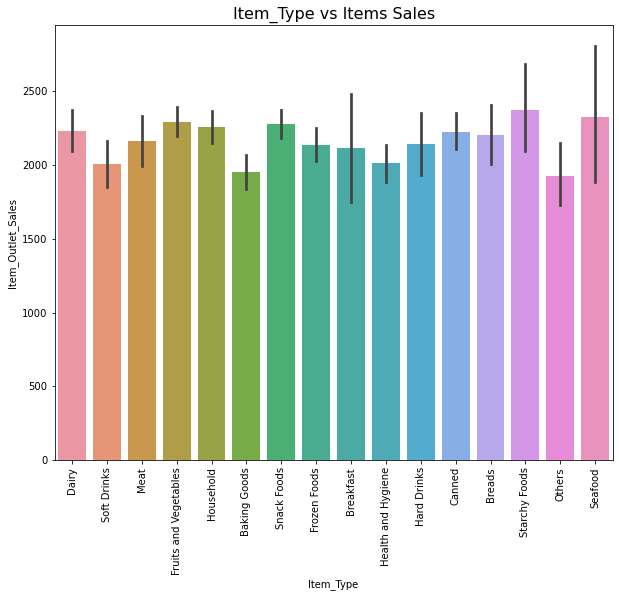

In [53]:
plt.figure(figsize=(10,8))
C_OutletType = sns.barplot(x= 'Item_Type', y = np.exp(df['Item_Outlet_Sales']) , data=df)
C_OutletType.set_xticklabels(C_OutletType.get_xticklabels(), rotation=90)
plt.title('Item_Type vs Items Sales',fontsize=16)
None

In [54]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,MRP_per_unit_weight,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.008059,-0.585147,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.202466,-0.005141,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.509886,0.707961,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,0.077032,0.071195,-1.000000
Item_Outlet_Sales,0.008059,-0.202466,0.509886,0.077032,1.000000,0.366027,-0.077032
MRP_per_unit_weight,-0.585147,-0.005141,0.707961,0.071195,0.366027,1.000000,-0.071195
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,-0.077032,-0.071195,1.000000


<AxesSubplot:>

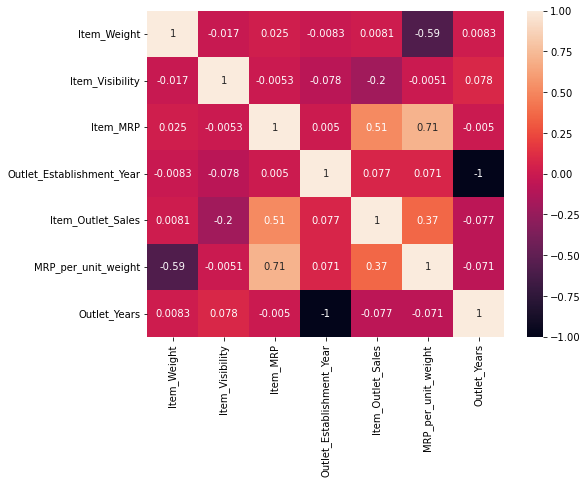

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True)

There is no significat correlation observed except Item_MRP vs Item_Outlet_Sales, the MRP of items increases the sales is also increa

#### We will look into outlet total sale by different feature wise using pivot table

In [56]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df.pivot_table(values= 'Item_Outlet_Sales', index = ['Outlet_Location_Type','Outlet_Type','Outlet_Size'], aggfunc = np.sum)

Item_Outlet_Sales
Outlet_Location_Type Outlet_Type       Outlet_Size                   
Tier 1               Grocery Store     Small                  2936.90
                     Supermarket Type1 Medium                 7003.43
                                       Small                  6975.20
Tier 2               Supermarket Type1 Small                 20933.00
Tier 3               Grocery Store     Small                  3075.08
                     Supermarket Type1 High                   6967.61
                     Supermarket Type2 Medium                 6804.20
                     Supermarket Type3 Medium                 7504.28

In [57]:
df.pivot_table(values = 'Item_Outlet_Sales' , index = ['Item_Fat_Content','New_Item_Type','Item_Type'], aggfunc = np.sum )

Item_Outlet_Sales
Item_Fat_Content New_Item_Type  Item_Type                               
Low Fat          Drinking       Dairy                             983.18
                                Hard Drinks                      1558.10
                                Soft Drinks                      2709.61
                 Food           Baking Goods                     2334.00
                                Breads                           1028.20
                                Breakfast                         299.90
                                Canned                           2510.44
                                Dairy                            2035.63
                                Frozen Foods                     3247.79
                                Fruits and Vegetables            4593.35
                                Meat                             1223.32
                                Seafood                           261.68
                                Snack Foods                      5159.89
                                Starchy Foods                     613.23
Non-Edible       Non-Consumable Health and Hygiene               3760.41
                                Household                        6682.00
                                Others                           1210.68
Regular          Drinking       Soft Drinks                       501.32
                 Food           Baking Goods                     2320.24
                                Breads                            813.76
                                Breakfast                         487.50
                                Canned                           2263.39
                                Dairy                            1948.86
                                Frozen Foods                     2957.69
                                Fruits and Vegetables            4457.52
                                Meat                             1873.06
                                Seafood                           203.46
                                Snack Foods                      3681.06
                                Starchy Foods                     480.42

In [58]:
df.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Size','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Size Outlet_Identifier                   
High        OUT013                       6967.61
Medium      OUT018                       6804.20
            OUT027                       7504.28
            OUT049                       7003.43
Small       OUT010                       3075.08
            OUT017                       6961.77
            OUT019                       2936.90
            OUT035                       7042.61
            OUT045                       6928.61
            OUT046                       6975.20

### Data Pre-Processing

#### Label Encoding

In [59]:
# Label encoding for variables which have internal dependency.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

#### One hot encoding

In [61]:
#one hot encoding for variables which have no internal dependency
df = pd.get_dummies(df,columns=['Outlet_Type','Item_Fat_Content','New_Item_Type','Outlet_Size','Outlet_Location_Type'])

In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Shelf_life,MRP_per_unit_weight,...,Item_Fat_Content_Regular,New_Item_Type_Drinking,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0.02,Dairy,249.81,OUT049,1999,8.23,perishable,26.86,...,0,0,1,0,0,1,0,1,0,0
1,DRC01,5.92,0.02,Soft Drinks,48.27,OUT018,2009,6.10,non_perishable,8.15,...,1,1,0,0,0,1,0,0,0,1
2,FDN15,17.50,0.02,Meat,141.62,OUT049,1999,7.65,perishable,8.09,...,0,0,1,0,0,1,0,1,0,0
3,FDX07,19.20,0.07,Fruits and Vegetables,182.09,OUT010,1998,6.60,perishable,9.48,...,1,0,1,0,0,0,1,0,0,1
4,NCD19,8.93,0.07,Household,53.86,OUT013,1987,6.90,non_perishable,6.03,...,0,0,0,1,1,0,0,0,0,1


In [63]:
df.shape

(8523, 28)

In [64]:
df.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Shelf_life                        object
MRP_per_unit_weight              float64
Outlet_Years                       int64
Outlet                             int32
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
New_Item_Type_Drinking             uint8
New_Item_Type_Food                 uint8
New_Item_Type_Non-Consumable       uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Smal

### Spliting data into Train & Test

In [65]:
train = df.drop(['Item_Outlet_Sales','Item_Identifier','Item_Type','Outlet_Identifier','Shelf_life'],axis=1)
test = df['Item_Outlet_Sales']

In [66]:
print(train.shape)
print(test.shape)

(8523, 23)
(8523,)


## Statistical Analysis

In [67]:
import statsmodels.api as sm

In [68]:
x = train
y = test
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1371.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:22:22   Log-Likelihood:                -6788.7
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8506   BIC:                         1.373e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Observations
1.p value for F satistic is < 0.05 so we can say that our model is significant (at least for one independent variable, the regression coef. is not equal zero,rejecting the null hypothesis,The null hypothesis under this is “all the regression coefficients are equal to zero”.)

2.R squared value indicates that 72.1 percentage of the variance in the dependent variable is explained by our model , Adjusted R square value is lesser than R square that is indicating that our model has insignificant attributes.

3.Now we will check p values for each attributes if the p values is <0.05 we will say that the attribute is contributing to the model (reject the null hypothesis(coef=0)) if > 0.05 then the attribute is insigficant (accept the null hypothesis(coef=0))

4 looking the p values we can say {'Item_Weight','Item_Visibility','MRP_per_unit_weight','Item_Fat_Content_Low Fat',
'Item_Fat_Content_Non-Edible','New_Item_Type_Drinking','New_Item_Type_Food','Item_Fat_Content_Regular',
'New_Item_Type_Non-Consumable','Outlet_Location_Type_Tier 2'} have no contribution to the dependent variable.

5 We can conclude that these attributes are not driving the sales

6.Prob(Omnibus): One of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is 0.000, which implies that the OLS assumption is not satisfied , the errors are not normally distributed

7.Durbin-watson: Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is 2.008 (~2) implying that the regression results are reliable from the interpretation side of this metric.

8..Prob(Jarque-Bera): It is in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors. It is supposed to agree with the results of Omnibus test. A large value of JB test indicates that the errors are not normally distributed.
                      
                      

In [69]:
train_1 = train.drop(['Item_Weight','Item_Visibility','MRP_per_unit_weight',
                      'Item_Fat_Content_Low Fat','Item_Fat_Content_Non-Edible','New_Item_Type_Drinking',
                      'New_Item_Type_Food','Item_Fat_Content_Regular',
                      'New_Item_Type_Non-Consumable','Outlet_Location_Type_Tier 2'],axis=1)

In [70]:
x = train_1
y = test
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     2194.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:22:22   Log-Likelihood:                -6790.4
No. Observations:                8523   AIC:                         1.360e+04
Df Residuals:                    8512   BIC:                         1.368e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Observations
1.F-statistic has increased by a significat amount , p value (F-statistic) <0.05 so model is significant.

2.R squared has decreases  which proves that the dropped attributes were insignificant for the model.

3.the p value of all attributes are <0.05 so , all the selected attributes are significant to dependet variable

### Spliting data for training

In [71]:
from sklearn.model_selection import train_test_split , cross_val_score,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [72]:
X_train , X_test, y_train , y_test = train_test_split(train_1,test,test_size = 0.25, shuffle = True,random_state=100)

### Modelling

In [73]:
def model_details(model,alg):
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    acc=round(model.score(X_test,y_test)*100,2)
    cvs=cross_val_score(model,X_test,y_test,cv=5)
    mean=round(cvs.mean()*100,2)
    std=round(cvs.std()*2,2)
    print("Model Report")
    print('Accuracy of {}: {}%'.format(alg,acc),)
    print('RMSE Value: ',round(rmse,2))
    print('Cross Validation Score: Mean - {} | Std - {}'.format(mean,std))
    print('MAE Value: ',round(mae,2))
    
    

### Base Model

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
base_model = np.exp(test.mean())
base_model

1477.1403771510859

In [76]:
base_model = [base_model]*len(test)

In [77]:
base_rmse = np.sqrt(mean_squared_error(np.exp(test) ,base_model))
base_mae = mean_absolute_error(np.exp(test) ,base_model)

In [78]:
print(base_rmse)
print(base_mae)

1846.3568768390555
1337.3645387774316


In [79]:
print("The RMSE of Base Mode : " , base_rmse)
print("The MAE of Base Mode : " , base_rmse)

The RMSE of Base Mode :  1846.3568768390555
The MAE of Base Mode :  1846.3568768390555


### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [81]:
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.7110512171093617

In [82]:
y_pred = LR.predict(X_test)
y_pred = np.exp(y_pred)
y_test_lr = np.exp(y_test)

In [83]:
rmse=np.sqrt(mean_squared_error(y_test_lr,y_pred))
mae = mean_absolute_error(y_test_lr,y_pred)

In [84]:
print("The RMSE of Linear Regression : " , rmse)
print("The MAE of Linear Regression : " , mae)

The RMSE of Linear Regression :  1161.4061530888232
The MAE of Linear Regression :  802.8998253050926


In [85]:
model_details(LR,'LinearRegression')

Model Report
Accuracy of LinearRegression: 71.11%
RMSE Value:  0.54
Cross Validation Score: Mean - 70.86 | Std - 0.04
MAE Value:  0.42


### Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=600, min_samples_leaf=100, min_samples_split=8, max_depth=8)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=100, min_samples_split=8,
                      n_estimators=600)

In [87]:
#RF = RandomForestRegressor(n_estimators= 600,min_samples_split= 5,min_samples_leaf= 8,max_depth= 670)
#RF.fit(X_train,y_train)

In [88]:
RF.score(X_test,y_test)

0.7166810078239485

In [89]:
y_pred_rf = RF.predict(X_test)
y_pred_rf = np.exp(y_pred_rf)

In [90]:
rmse=np.sqrt(mean_squared_error(y_test_lr,y_pred_rf))
mae = mean_absolute_error(y_test_lr,y_pred_rf)

In [91]:
print("The RMSE of Random Forest : " , rmse)
print("The MAE of Random Forest : " , mae)

The RMSE of Random Forest :  1126.4712972892767
The MAE of Random Forest :  785.1589225440509


In [92]:
model_details(RF,'RandomForestRegressor')

Model Report
Accuracy of RandomForestRegressor: 71.67%
RMSE Value:  0.53
Cross Validation Score: Mean - 66.52 | Std - 0.05
MAE Value:  0.41


### XG Boost

In [93]:
!pip3 install xgboost

In [94]:
from xgboost import XGBRegressor

In [95]:
XG=XGBRegressor(learning_rate=0.05, subsample=1,max_depth= 2,n_estimators=400 )

In [96]:
XG.fit(X_train,y_train)
XG.score(X_test,y_test)

0.7256862876052343

In [97]:
y_pred_xg = XG.predict(X_test)
y_pred_xg = np.exp(y_pred_xg)

In [98]:
rmse=np.sqrt(mean_squared_error(y_test_lr,y_pred_xg))
mae_P = mean_absolute_error(y_test_lr,y_pred_xg)


In [99]:
print("The RMSE of XGBRegressor : " , rmse)
print("The MAE of XGBRegressor : " , mae)

The RMSE of XGBRegressor :  1114.3192627225426
The MAE of XGBRegressor :  785.1589225440509


In [100]:
model_details(XG,'XGBRegressor')

Model Report
Accuracy of XGBRegressor: 72.57%
RMSE Value:  0.53
Cross Validation Score: Mean - 71.84 | Std - 0.04
MAE Value:  0.4


#### Comparing B/W actual sales and Predicted Sales

As XGB has given me best performence i will check by XGB regressor

In [101]:
y_pred_random=XG.predict(X_test)

In [102]:
pred_xgb=pd.DataFrame(y_pred_random,columns=['predicted_xgb'])
true_values=list(y_test.values)
pred_xgb['true_value']=true_values
#pred_xgb['true_value']=y_test

In [103]:
pred_xgb

,predicted_xgb,true_value
0,7.94,8.40
1,8.23,8.49
2,8.51,7.74
3,7.34,6.97
4,7.83,7.76
...,...,...
2126,7.31,6.95
2127,7.50,7.58
2128,7.55,7.98
2129,8.50,8.61


In [104]:
np.exp(pred_xgb)

,predicted_xgb,true_value
0,2810.14,4427.24
1,3741.44,4846.03
2,4975.26,2294.02
3,1537.21,1066.28
4,2519.87,2346.61
...,...,...
2126,1496.21,1039.65
2127,1814.36,1961.12
2128,1903.36,2923.20
2129,4922.75,5500.51


In [105]:
comp=pred_xgb
comp=comp.iloc[1:50]
true_value=comp['true_value']
predicted_value=comp['predicted_xgb']

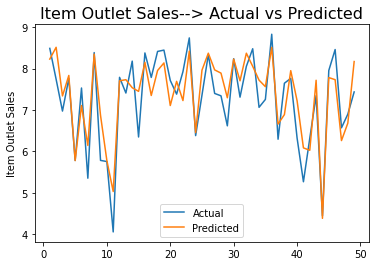

In [106]:
plt.plot(true_value)
plt.plot(predicted_value)
plt.ylabel('Item Outlet Sales')
plt.legend(['Actual','Predicted'])
plt.title("Item Outlet Sales--> Actual vs Predicted",fontsize=16)
plt.show()

### Observations:
The RMSE and R squared value is comparatively better for XGB regressor and their R2 score is 72% so we will consider this models  according to business requirement , Later on we can try to hyper tune the models and check for the optimum results.